# 3 Surprising Facts About Global Poverty and Life Expectancy
## By: Kylie Taylor

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})

import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.express as px

from sklearn.linear_model import LinearRegression, LassoCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [2]:
# Read in the data set
# wide format
masterfile = pd.read_csv("https://raw.githubusercontent.com/KylieTaylor/Udacity-Data-Science-Nanodegree/main/Blog%20Post/Data/masterfile.csv")

# long format
masterfile_long = pd.read_csv("https://raw.githubusercontent.com/KylieTaylor/Udacity-Data-Science-Nanodegree/main/Blog%20Post/Data/masterfile_long.csv")

In [5]:
# inspecting the data set
print(masterfile.describe())

In [6]:
print(masterfile.head())

In [7]:
# removing the first column which is a duplicate of the index 

masterfile.drop(['Unnamed: 0'], axis=1, inplace=True)
masterfile_long.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
#inspect that the code worked correctly
print(masterfile_long.head(3))

In [10]:
# Data dictionary for what each column is measuring 
markers = {
    'SI.POV.NAHC' : 'Poverty headcount ratio at national poverty lines (percent of population)',
    'SI.DST.FRST.20' : 'Income share held by lowest 20%',
    'SP.DYN.LE00.IN' : 'Life expectancy at birth, total (years)',
    'SE.ENR.PRSC.FM.ZS' : 'School enrollment, primary and secondary (gross), gender parity index (GPI)',
    'NY.GDP.MKTP.CD' : 'GDP (current US$)',
    'NY.GDP.MKTP.KD.ZG' : 'GDP growth (annual %)',
    'NY.GDP.PCAP.CD' : 'GDP per capita (current US$)',
    'FP.CPI.TOTL.ZG' : 'Inflation, consumer prices (annual %)',
    'SE.XPD.TOTL.GD.ZS' : 'Government expenditure on education as percent of GDP',
    'SE.PRM.ENRR.FE' : 'Gross enrollment ratio, primary, female (%)',
    'SE.ENR.PRIM.FM.ZS' : 'Gross enrollment ratio, primary, gender parity index (GPI)',
    'SE.PRM.UNER' : 'Out-of-school children of primary school age, both sexes (number)'
}

## Poverty Rates from 2020 to 2015 

The rate of poverty in all countries has been ____

In [11]:
# create a list of the column names to refer back to
for col in masterfile_long.columns: 
    print(col)

Unnamed: 0
Country.Name
Year
SI.POV.NAHC
SI.DST.FRST.20
SP.DYN.LE00.IN
SE.ENR.PRSC.FM.ZS
NY.GDP.MKTP.CD
NY.GDP.MKTP.KD.ZG
NY.GDP.PCAP.CD
FP.CPI.TOTL.ZG
SE.XPD.TOTL.GD.ZS
SE.PRM.ENRR.FE
SE.ENR.PRIM.FM.ZS
SE.PRM.UNER


In [12]:
# subset the masterfile into third world countries and richest oecd countries

third_world_df = masterfile_long[masterfile_long['Country.Name'].isin(['Tuvalu', 'Somalia', 'Niger', 'Central African Republic', 'South Sudan', 'Chad', 'Burundi', 'Sierra Leone', 'Burkina Faso', 'Mali', 'Liberia', 'Mozambique'])]
#, 'Eritrea', 'Yemen', 'Guinea Bissau', 'Guinea', 'Gambia', 'Ethiopia', 'Djibouti', 'Malawi', 'Haiti', 'Afghanistan', 'Sudan', 'Comoros', 'Togo', 'Senegal', 'Benin', 'Uganda', 'Madagascar'

OECD_df = masterfile_long[masterfile_long['Country.Name'].isin(['Singapore', 'Qatar', 'Ireland', 'Switzerland', 'Norway', 'United States', 'United Arab Emirates', 'Denmark', 'Netherlands', 'Austria', 'Iceland', 'Germany'])]

In [31]:
third_world_df.mean()

Unnamed: 0           6.895000e+02
Year                 2.012500e+03
SI.POV.NAHC          4.989091e+01
SI.DST.FRST.20       7.033333e+00
SP.DYN.LE00.IN       5.559797e+01
SE.ENR.PRSC.FM.ZS    8.582383e-01
NY.GDP.MKTP.CD       7.976177e+09
NY.GDP.MKTP.KD.ZG    3.292053e+00
NY.GDP.PCAP.CD       9.380470e+02
FP.CPI.TOTL.ZG       6.640387e+00
SE.XPD.TOTL.GD.ZS    3.453939e+00
SE.PRM.ENRR.FE       9.082572e+01
SE.ENR.PRIM.FM.ZS    8.832996e-01
SE.PRM.UNER          6.835956e+05
dtype: float64

In [32]:
OECD_df.mean()

Unnamed: 0           7.695000e+02
Year                 2.012500e+03
SI.POV.NAHC          1.332558e+01
SI.DST.FRST.20       8.416327e+00
SP.DYN.LE00.IN       8.065669e+01
SE.ENR.PRSC.FM.ZS    9.924175e-01
NY.GDP.MKTP.CD       1.998733e+12
NY.GDP.MKTP.KD.ZG    3.244895e+00
NY.GDP.PCAP.CD       5.895588e+04
FP.CPI.TOTL.ZG       1.666829e+00
SE.XPD.TOTL.GD.ZS    5.631542e+00
SE.PRM.ENRR.FE       1.014331e+02
SE.ENR.PRIM.FM.ZS    1.000509e+00
SE.PRM.UNER          6.707186e+04
dtype: float64

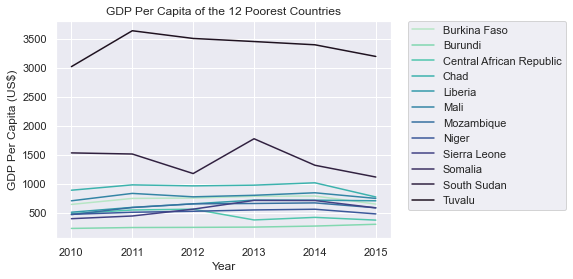

In [14]:
palette = sns.color_palette("mako_r", len(pd.unique(third_world_df['Country.Name'])))
sns.lineplot(
    data = third_world_df, x = "Year", y = "NY.GDP.PCAP.CD",
    hue = "Country.Name",
    palette = palette
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('GDP Per Capita of the 12 Poorest Countries')
plt.ylabel('GDP Per Capita (US$)')
plt.savefig('Images/gdp_12_poorest.jpg',dpi=150, figsize=(8,10)) # fix this sizing 

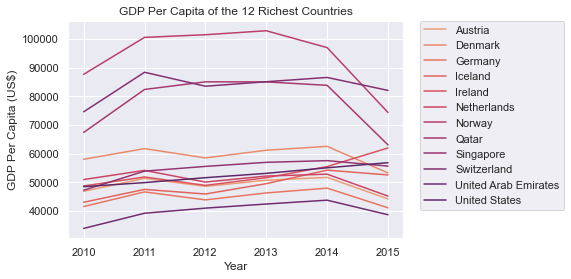

In [15]:
palette_oecd = sns.color_palette("flare", len(pd.unique(OECD_df['Country.Name'])))
sns.lineplot(
    data = OECD_df, x = "Year", y = "NY.GDP.PCAP.CD",
    hue = "Country.Name",
    palette = palette_oecd
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('GDP Per Capita of the 12 Richest Countries')
plt.ylabel('GDP Per Capita (US$)')
plt.savefig('Images/gdp_12_richest.jpg',dpi=150, figsize=(8,10))

## Lag of Education on GDP and Life Expactancy

Calculate the correlation between a countries' education rate and GDP growth and percent of population in poverty. May not be able to see a relationship with a 5 year lag. 

In [17]:
# reprint this bad boy becuase I'm lazy
for col in masterfile.columns: 
    print(col)

Unnamed: 0
Country.Name
SI.POV.NAHC_2000
SI.DST.FRST.20_2000
SP.DYN.LE00.IN_2000
SE.ENR.PRSC.FM.ZS_2000
NY.GDP.MKTP.CD_2000
NY.GDP.MKTP.KD.ZG_2000
NY.GDP.PCAP.CD_2000
FP.CPI.TOTL.ZG_2000
SI.POV.NAHC_2001
SI.DST.FRST.20_2001
SP.DYN.LE00.IN_2001
SE.ENR.PRSC.FM.ZS_2001
NY.GDP.MKTP.CD_2001
NY.GDP.MKTP.KD.ZG_2001
NY.GDP.PCAP.CD_2001
FP.CPI.TOTL.ZG_2001
SI.POV.NAHC_2002
SI.DST.FRST.20_2002
SP.DYN.LE00.IN_2002
SE.ENR.PRSC.FM.ZS_2002
NY.GDP.MKTP.CD_2002
NY.GDP.MKTP.KD.ZG_2002
NY.GDP.PCAP.CD_2002
FP.CPI.TOTL.ZG_2002
SI.POV.NAHC_2003
SI.DST.FRST.20_2003
SP.DYN.LE00.IN_2003
SE.ENR.PRSC.FM.ZS_2003
NY.GDP.MKTP.CD_2003
NY.GDP.MKTP.KD.ZG_2003
NY.GDP.PCAP.CD_2003
FP.CPI.TOTL.ZG_2003
SI.POV.NAHC_2004
SI.DST.FRST.20_2004
SP.DYN.LE00.IN_2004
SE.ENR.PRSC.FM.ZS_2004
NY.GDP.MKTP.CD_2004
NY.GDP.MKTP.KD.ZG_2004
NY.GDP.PCAP.CD_2004
FP.CPI.TOTL.ZG_2004
SI.POV.NAHC_2005
SI.DST.FRST.20_2005
SP.DYN.LE00.IN_2005
SE.ENR.PRSC.FM.ZS_2005
NY.GDP.MKTP.CD_2005
NY.GDP.MKTP.KD.ZG_2005
NY.GDP.PCAP.CD_2005
FP.CPI.TOTL.ZG_200

In [24]:
# select subset of gdp, life expectancy, and education variables
subset = masterfile[["Country.Name", "NY.GDP.PCAP.CD_2015", "SP.DYN.LE00.IN_2015", "SE.XPD.TOTL.GD.ZS_2010", "SE.ENR.PRIM.FM.ZS_2010","SE.XPD.TOTL.GD.ZS_2011", "SE.ENR.PRIM.FM.ZS_2011", "SE.XPD.TOTL.GD.ZS_2012", "SE.ENR.PRIM.FM.ZS_2012", "SE.XPD.TOTL.GD.ZS_2013", "SE.ENR.PRIM.FM.ZS_2013", "SE.XPD.TOTL.GD.ZS_2014", "SE.ENR.PRIM.FM.ZS_2014"]]

# rename the columns
subset.columns = ["Country", "GDP_per_Cap_2015", "Life_Expectancy_2015", "Expenditure_2010", "Enrollment_2010", "Expenditure_2011", "Enrollment_2011", "Expenditure_2012", "Enrollment_2012", "Expenditure_2013", "Enrollment_2013", "Expenditure_2014", "Enrollment_2014"]


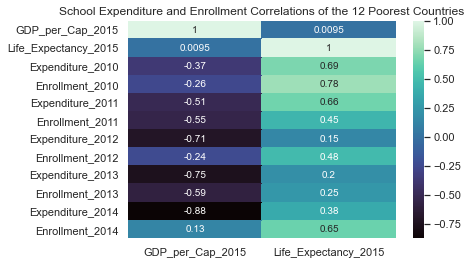

In [36]:

# sub-subset into the 12 poorest countries
subset1 = subset[subset['Country'].isin(['Tuvalu', 'Somalia', 'Niger', 'Central African Republic', 'South Sudan', 'Chad', 'Burundi', 'Sierra Leone', 'Burkina Faso', 'Mali', 'Liberia', 'Mozambique'])]

corr_gdp_poorest = subset1.corr()[["GDP_per_Cap_2015", "Life_Expectancy_2015"]]
corr_gdp_poorest = pd.DataFrame(corr_gdp_poorest)

sns.heatmap(corr_gdp_poorest, annot=True, cmap="mako")
plt.title("School Expenditure and Enrollment Correlations of the 12 Poorest Countries")
plt.savefig('Images/corr_poorest.jpg',dpi=150, figsize=(10,8)) #fix the sizing!!!

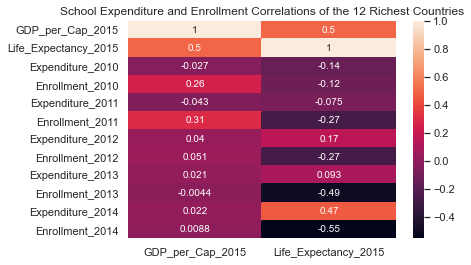

In [19]:
# sub-subset into the 12 richest countries
subset2 = subset[subset["Country"].isin(['Singapore', 'Qatar', 'Ireland', 'Switzerland', 'Norway', 'United States', 'United Arab Emirates', 'Denmark', 'Netherlands', 'Austria', 'Iceland', 'Germany'])]

corr_gdp_richest = subset2.corr()[["GDP_per_Cap_2015", "Life_Expectancy_2015"]]
corr_gdp_richest = pd.DataFrame(corr_gdp_richest)

sns.heatmap(corr_gdp_richest, annot=True)
plt.title("School Expenditure and Enrollment Correlations of the 12 Richest Countries")
plt.savefig('Images/corr_richest.jpg',dpi=150, figsize=(10,8)) #fix the sizing!!!

## Heatmap of Countries

Heatmaps showing how GDP per Capita have

In [25]:
# impute missing values using a KNN imputer with 2 neighbors
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")

mf = masterfile_long.drop(['Country.Name'], axis=1)
df = pd.DataFrame(imputer.fit_transform(mf))
df.columns = mf.columns # rename all the columns

df1 = pd.concat([masterfile_long[["Country.Name"]], df], axis=1) # add the country names back onto the imputed data

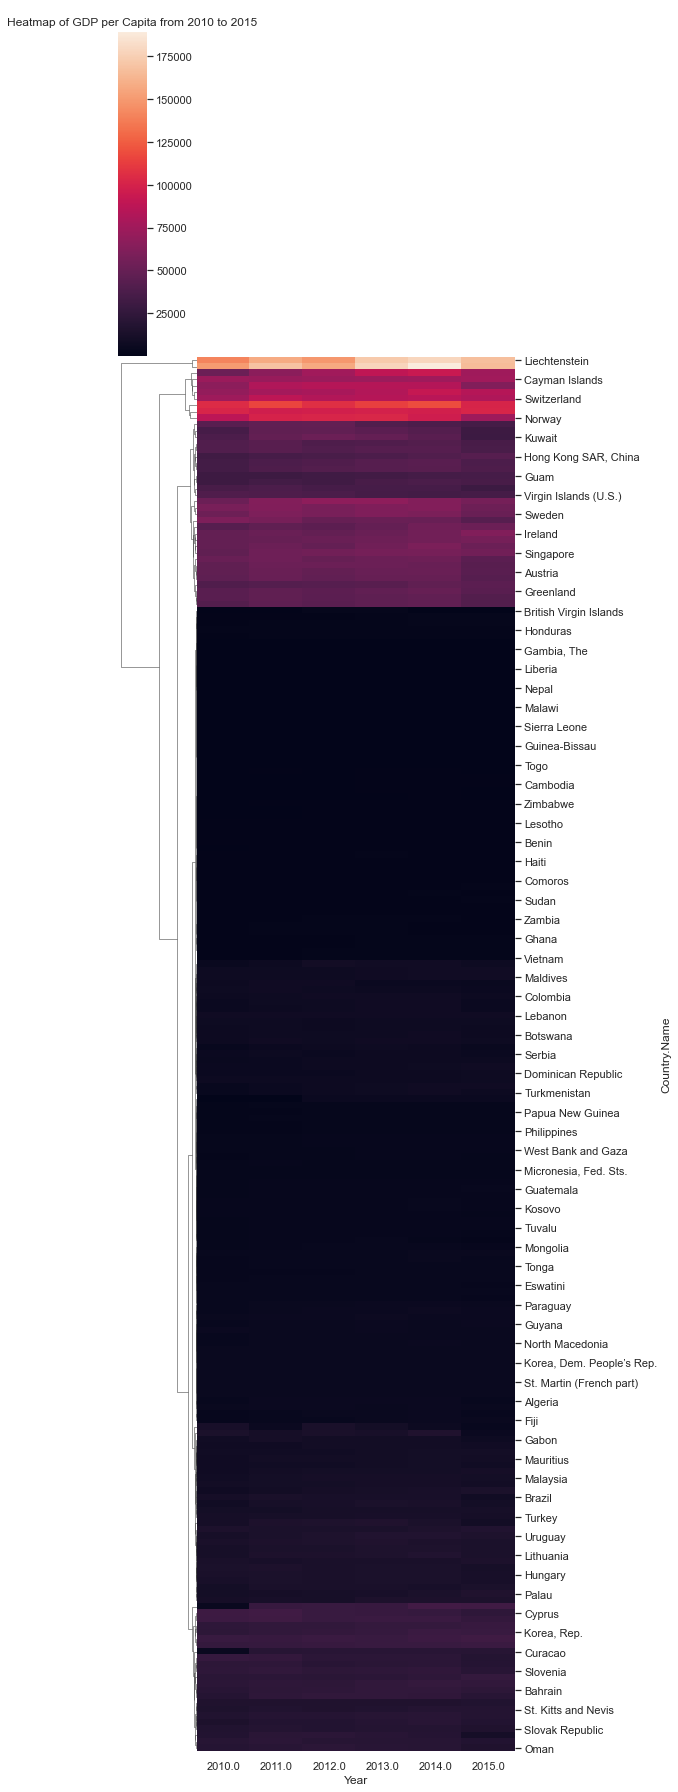

In [27]:
heatmap_gdp = pd.pivot_table(df1, values="NY.GDP.PCAP.CD", 
                              index="Country.Name", 
                              columns="Year")

# make heatmap with Seaborn ClusterMap
# the clusterMap algorithm uses a centroid clustering method
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage 

sns.clustermap(heatmap_gdp, col_cluster=False, figsize=(8,25), method='centroid')
plt.title('Heatmap of GDP per Capita from 2010 to 2015')
plt.savefig('Images/heatmap_gdp.jpg',dpi=150, figsize=(8,25))

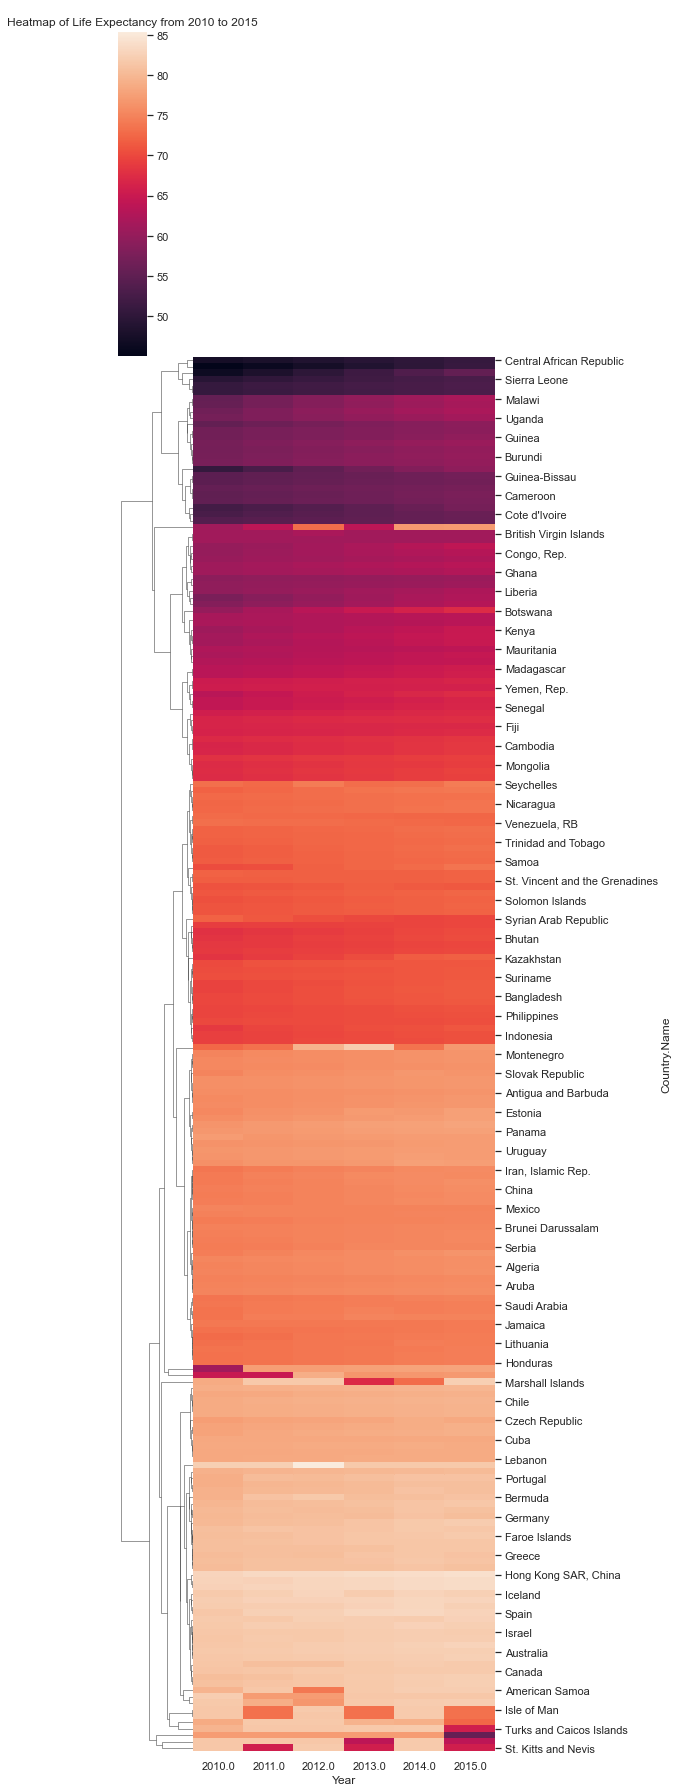

In [22]:
heatmap_life_expectancy = pd.pivot_table(df1, values="SP.DYN.LE00.IN", 
                              index="Country.Name", 
                              columns="Year")

sns.clustermap(heatmap_life_expectancy, col_cluster=False, figsize=(8,25), method='centroid')
plt.title('Heatmap of Life Expectancy from 2010 to 2015')
plt.savefig('Images/heatmap_life_expectancy.jpg', dpi=150, figsize=(8,25))